In [1]:
import numpy as np
#import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
# import matplotlib as mpl
#import seaborn as sns
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import LogFormatter
from scipy.optimize import curve_fit
%matplotlib inline

In [3]:
def MaxcutSize(n):
    if n%2 == 0: ## even
        k = n/2
        return (n-1) + (k-1) + (2*(n-1) + 2) + (k-2)*(2*(n-2) + 1)
    elif n%2 == 1: ## odd
        k = (n-1)/2
        return 2 + (k-1) + 2*((n-3)*2 + 2) + (k-2)*((n-3)*2 + 1)
    else:
        print('ERROR: Parity is even or odd in MaxcutSize!!')

def MincutSize(n):
    if n%2 == 0: ## even
        return n
    elif n%2 == 1: ## odd
        k = (n-1)/2
        return (n-k)+(n-1)
    else:
        print('ERROR: Parity is even or odd in MincutSize!!')

def Totalcount(n,cutsize):    
    ##### total number of couplers = 2*(n-1)*n
    return (n-1)*(n**3)/cutsize

def memory(n, cutsize):
    chi = 2**((n**2)/(2*cutsize))
    return 2*(chi**4)*(n**2 - 4*(n-1)-4) + 2*(chi**3)*4*(n-2) + 2*(chi**2)*4



def MaxcutSize2(N):
    ### Assume N is even
    n = np.sqrt(N)
    k = n/2
    return (n-1) + (k-1) + (2*(n-1) + 2) + (k-2)*(2*(n-2) + 1) 

def MincutSize2(N):
    n = np.sqrt(N)
    return n

def Totalcount2(N,cutsize):    
    ##### total number of couplers = 2*(n-1)*n
    n = np.sqrt(N)
    return 4*(n-1)*(n**3)/cutsize

def memory2(N, cutsize):
    n = np.sqrt(N)
    chi = 2**((n**2)/(2*cutsize))
    return 2*(chi**4)*(n**2 - 4*(n-1)-4) + 2*(chi**3)*4*(n-2) + 2*(chi**2)*4

def gate_depth(N):
    n = np.sqrt(N)
    return 4*n/2

def strn_ops(N):
    n = np.sqrt(N)
    c = 35
    total_ops = gate_depth(N)*2*(n-1)*n
    return c*total_ops*(2**(1*N))*(total_ops-1)

def log_runtime(N,m):
    # N = total number of qubits; m = gate depth
    n = np.sqrt(N)
    c = 35
    total_ops = m*2*(n-1)*n
    flops = 10**17
    return np.log(3.171e-8*(1/flops)*c*total_ops)  + np.log(2)*(1*N*(total_ops-1)) # (1/flops)*c*total_ops*(2**(1*N*(total_ops-1))) 
    
#def bravyi_runtime(N, m, eps, pf):    
#    n = np.sqrt(N)
#    c = 1
#    total_ops = m*2*(n-1)*n
#    t = (m/8)*(3*n*n - n - n - 1 ) - 0.25*n*n
#    flops = 10**17   
#    return (1/flops)*c*( (N + t)*total_ops + ((N+t)**3) + (2**(0.5*t))*(t**3)*(eps**(-2))*np.log(1/pf) )

def bravyi_runtime(N, m, eps, pf):    
    n = np.sqrt(N)
    c = 1
    #total_gts = (m/8)*(2*(n-1)*n ) + (m/8)*(3*n*n - n - n - 1 ) - 0.25*n*n
    t = (0.25)*( (m/8)*(3*n*n - n - n - 1 ) - 0.25*n*n )
    flops = 10**17   
    print(t)
    return np.log((flops**(-1))*c*(t**3)*(eps**(-2))*np.log10(pf**(-1)) ) + (0.5*t)*np.log(2)
    #return (flops**(-1))*c*(t**3)*(eps**(-2))*np.log10(pf**(-1))*(2**(0.5*t))

def f_fit(N, a):
    return a*Totalcount2(N,MincutSize2(N))
    
def return_fit(xcoord, ycoord):
    np.random.seed(1729)
    popt, pcov = curve_fit(f_fit, xcoord, ycoord)
    return popt

def f_fit_depth(N, a):
    return a*gate_depth(N)


def return_fit_depth(xcoord, ycoord):
    np.random.seed(1729)
    popt, pcov = curve_fit(f_fit_depth, xcoord, ycoord)
    return popt


####### fit bravyi formula ##############

def f_fit_bravyi(X, a1, a2):
    n = np.sqrt(X[0])
    m = X[1]
    c = 1
    #total_ops = X[1]*2*(n-1)*n
    #t = total_ops
    t = (0.25)*( (m/8)*(3*n*n - n - n - 1 ) - 0.25*n*n )
    flops = 10**17   
    eps=0.01
    pf=0.25
    #return (1/flops)*c*( a2*(X[0] + t)*total_ops + a3*((X[0]+t)**3) + a1*(2**(0.5*t))*(t**3)*(eps**(-2))*np.log(1/pf) )
    #return a2*(a1*np.log((flops**(-1))*c*(t**3)*((eps)**(-2))*np.log10(pf**(-1)) ) + a3*(0.5*t)*np.log(2) )
    return (np.log(a1*(flops**(-1))*c*(t**3)*((eps)**(-2))*np.log10(pf**(-1)) ) + a2*(0.5*t)*np.log(2) )
    
def return_fit_bravyi(xcoord, ycoord):
    np.random.seed(1729)
    popt, pcov = curve_fit(f_fit_bravyi, xcoord, ycoord)
    return popt


######### fit polynomial method formula #######################

def f_fit_poly(X, a1, a2):
    n = np.sqrt(X[0])
    t = X[1]
    total_ops = X[1]*2*(n-1)*n
    flops = (10**17)   
    return (1/flops)*a1*(2*total_ops)*(2**(a2*(X[0]+total_ops)))

def return_fit_poly(xcoord, ycoord):
    np.random.seed(1729)
    popt, pcov = curve_fit(f_fit_poly, xcoord, ycoord)
    return popt



######## fit Markov shi corollary 1.5 formula ##########################

def f_fit_shi(X, a1, a2):
    n = np.sqrt(X[0])
    m = X[1]
    total_gts = X[1]*2*(n-1)*n
    flops = 10**17
    return a1*np.log(total_gts) + a2*n*m*np.log(2) + np.log(10**(-17))
    #return (total_gts**(a1))*(2**(a2*n*m))
    
def return_fit_shi(xcoord, ycoord):
    np.random.seed(1729)
    popt, pcov = curve_fit(f_fit_shi, xcoord, ycoord)
    return popt



In [4]:
nmax = 400
#qbit_array = np.arange(4,nmax,2)
qbit_array = np.arange(16,nmax,0.1)
mincut_array = list(map(MincutSize2, qbit_array))
maxcut_array = list(map(MaxcutSize2, qbit_array))

count_mincut_array = np.multiply(15,[Totalcount2(x,y) for x,y in zip(qbit_array, mincut_array)])
count_maxcut_array = np.multiply(15,[Totalcount2(x,y) for x,y in zip(qbit_array, maxcut_array)])
count_mincut_array_n = np.multiply(6,[Totalcount2(x,y) for x,y in zip(qbit_array, mincut_array)])
count_maxcut_array_n = np.multiply(6,[Totalcount2(x,y) for x,y in zip(qbit_array, maxcut_array)])
count_mincut_array_1 = np.multiply(1,[Totalcount2(x,y) for x,y in zip(qbit_array, mincut_array)])
count_maxcut_array_1 = np.multiply(1,[Totalcount2(x,y) for x,y in zip(qbit_array, maxcut_array)])

gate_depth_array = list(map(gate_depth, qbit_array))
gate15_depth_array = np.multiply(15, list(map(gate_depth, qbit_array)))
gate4_depth_array = np.multiply(4,list(map(gate_depth, qbit_array)))

total_time_array = np.multiply((1/(10**17)),list(map(strn_ops, qbit_array)))

nmax_mem = 400
qbit_array_mem = np.arange(16,nmax_mem,0.1)
mincut_array_mem = list(map(MincutSize2, qbit_array_mem))
maxcut_array_mem = list(map(MaxcutSize2, qbit_array_mem))

memory_mincut_array = np.multiply(8,[memory2(x,y) for x,y in zip(qbit_array_mem, mincut_array_mem)])
memory_maxcut_array = np.multiply(8,[memory2(x,y) for x,y in zip(qbit_array_mem, maxcut_array_mem)])

In [5]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

9.234419798751006
9.382053915193133
8.462474212656957
[4.36063901 0.04315488]


/home/mauro/.local/lib/python3.5/site-packages/matplotlib/contour.py:902: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/home/mauro/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


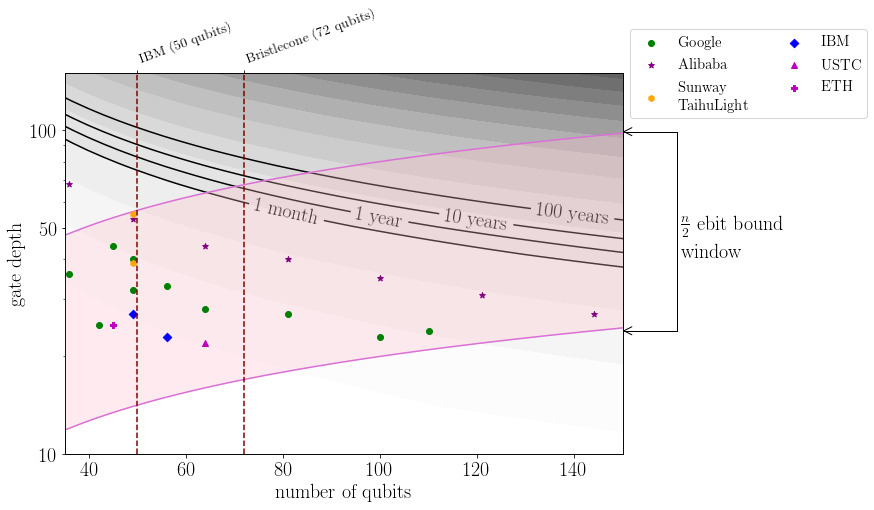

In [6]:
plt.rc('font', **{'family':'serif', 'serif':['Computer Modern Roman'],
                               'monospace': ['Computer Modern Typewriter'], 'size'  : 20})
plt.rc('text', usetex=True)
plt.figure(figsize=(10,7))
ax=plt.subplot(111)

ax.set_yscale('log')
ax.set_yticks([10,50,100])
ax.get_yaxis().set_major_formatter(StrMethodFormatter('{x:.0f}'))


##### xticks
xlim = ax.get_xlim()
#ax.set_xlim(35,180)
#ax.set_ylim(10, 350)
ax.set_xlim(35,150)
ax.set_ylim(10, 150)

plt.plot(qbit_array, gate_depth_array, color='orchid', zorder=5 )#,label='gate depth \n bound') #'coral'
plt.plot(qbit_array, gate4_depth_array, color='orchid', zorder=5)#, label=r'$4 \times$ ' + 'gate \n depth bound') #'blue'







##### points from characterizing quantum supremacy...(google)
xcoord_g1 = [42, 49] + [25, 45, 36, 49, 56, 64, 81, 100, 110]
ycoord_g1 = [25, 40] + [44, 44, 36, 32, 33, 28, 27, 23, 24]

##### points from classical simulation of intermediate size quantum circuits (ali baba)
xcoord_a = [36, 49, 64, 81, 100, 121, 144]
ycoord_a = [68, 53, 44, 40, 35, 31, 27]

##### points from Simulation of low depth quantum circuit complex undirected graphical models (google)
#xcoord_g2 = [25, 45, 36, 49, 56, 64, 81, 100, 110] # = [45, 56]
#ycoord_g2 = [44, 44, 36, 32, 33, 28, 27, 23, 24] #= [40, 30] 

##### points from TaihuLight paper (Taihulight)
xcoord_t = [49, 49]
ycoord_t = [39, 55]

##### points from IBM (Breaking the 49 qubit barrier)
xcoord_ibm = [49, 56]
ycoord_ibm = [27, 23]

##### points from 64-qubit quantum circuit simulation (USTC)
xcoord_ustc = [64]
ycoord_ustc = [22]

##### points from 0.5 PB simulation 0f 45 qubit circuit (ETH)
xcoord_eth = [45]
ycoord_eth = [25]


##### Generate curve fit
xcoord = xcoord_g1 + xcoord_a  + xcoord_t + xcoord_ibm + xcoord_ustc + xcoord_eth
ycoord = ycoord_g1 + ycoord_a  + ycoord_t + ycoord_ibm + ycoord_ustc + ycoord_eth
popt = return_fit_depth(xcoord, ycoord)



#### Bravyi curve fit
xcoord_ali = [36, 49, 64, 81, 100, 121]#, 144]
ycoord_ali = [68, 53, 44, 40, 35, 31]#, 27]

xData = [xcoord_ali, ycoord_ali]
#zData = [7000, 6000, 6000, 50000, 7000, 1000, 60]
#zData = np.log([7000, 6000, 50000, 7000])
zData = np.log([7000, 6000, 6000, 50000, 7000, 7000]) #, 100])
#zData = [7000, 6000, 6000, 50000, 7000, 7000]

popt2 = return_fit_shi(xData, zData)

print(f_fit_shi([144, 27], *popt2))
print(f_fit_shi([81, 40], *popt2))
print(f_fit_shi([64, 44], *popt2))
print(popt2)

################## Plot contour #########################
#gate_depths = np.linspace(5, 350, 50)
#number_qbits = np.linspace(5, 350, 50)
gate_depths = np.linspace(5, 450, 50)
number_qbits = np.linspace(5, 160, 50)


X, Y = np.meshgrid(number_qbits, gate_depths)
#Z = log_runtime(X, Y)
#Z = bravyi_runtime(X, Y, eps=0.01, pf=0.25) 'PuRd'
Z = f_fit_shi([X,Y], *popt2)
lvls = np.arange(0,92,5)
plt.contourf(X, Y, Z, 300, cmap='Greys', linestyles='solid', linewidths=50, zorder=0, levels=lvls) #[6,8,9, 10, 11,12, 13, 14, 15, 16, 17,18, 19 ,20, 21,22,23,24,25,26,27,30]) #,28,30,32])#, norm=matplotlib.colors.LogNorm())
#cbar = plt.colorbar()
#cbar.ax.set_yticklabels(['0','1','2','>3'])
#cbar.set_label('ln(time (sec))', labelpad=30, rotation=270)


CS = plt.contour(X, Y, Z, levels=[15,17,19, 22], colors='black')
c_labels = {15:r"$1$ month", 17:r"$1$ year", 19:r"$10$ years", 22:r'$100$ years'}
manual_locations = [(80,50),(100,55),(120,55), (140, 60)]
plt.clabel(CS, fmt=c_labels, manual=manual_locations)
##################################################################

plt.fill_between(qbit_array, gate4_depth_array, gate_depth_array, color='pink', zorder=5, alpha=0.3) #'aliceblue'

##############  Plot Data  #########################################
plt.scatter(xcoord_g1, ycoord_g1, color='green', label='Google', zorder=10)
plt.scatter(xcoord_a, ycoord_a, color='purple', marker='*', label='Alibaba', zorder=10)
#plt.scatter(xcoord_g2, ycoord_g2, color='green', marker='s', label='Google 2')
plt.scatter(xcoord_t, ycoord_t, color='orange', marker='h', label='Sunway \n TaihuLight', zorder=10)
plt.scatter(xcoord_ibm, ycoord_ibm, color='blue', marker='D', label='IBM', zorder=10)
plt.scatter(xcoord_ustc, ycoord_ustc, color='m', marker='^', label='USTC', zorder=10)
plt.scatter(xcoord_eth, ycoord_eth, color='m', marker='P', label='ETH', zorder=10)

#plt.plot(qbit_array, f_fit_depth(qbit_array, *popt), 'r--', label='fit curve')

##########################################################################

plt.axvline(x=72, color='maroon', linestyle='dashed', zorder=15)
#plt.axhline(y=f_fit_depth(72, *popt), color='black', linestyle='dashed')
plt.axvline(x=50, color='maroon', linestyle='dashed', zorder=15)
#plt.axhline(y=f_fit_depth(50, *popt), color='black', linestyle='dashed')


plt.ylabel(r' gate depth')
plt.xlabel(r' number of qubits')



#ax.text(x=135, y=17, s= r"$2.2 hrs$")
#ax.text(x=130, y=27, s= r"$6 hrs$")
#ax.text(x=125, y=42, s= r"$16 hrs$")

#ax.text(x=155, y=230, s= r"$15$ years")
#ax.text(x=155, y=140, s= r"$100$ days")
#ax.text(x=155, y=70, s= r"$2$ days")
#ax.text(x=155, y=35, s= r"$6$ hours")

ax.text(x=162, y=40, s= r'$\frac{n}{2}$' + ' ebit bound \n  window')

#plt.annotate(r"$\}$",fontsize=140,
#            xy=(150, 35))


ann = ax.annotate('', xy=(149, 99), xycoords='data',
                  xytext=(149, 24), textcoords='data',
                  arrowprops=dict(arrowstyle="<->",
                                  connectionstyle="bar",
                                  ec="k",
                                  shrinkA=5, shrinkB=5))
#ax.set_yticks([0,50,100])



ax2 = ax.twiny()
xextraticks2 = [50,72]
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(xextraticks2)
#ax2.set_xticklabels(X2)
ax2.set_xticklabels([r'IBM ($50$ qubits) ' , r'Bristlecone ($72$ qubits)'], rotation=20, fontsize=14, ha='left')


ax.legend(loc='center left', bbox_to_anchor=(1.0, 1.0), bbox_transform=ax.transAxes, ncol=2, prop={'size': 15})    #bbox_to_anchor=(1, 0.5))
plt.savefig('gate_depth_runtime_contour_fit.pdf', transparent=True, bbox_inches='tight')